# 🚀 Einführung: Prompting-Strategien für LLMs

Willkommen zu diesem interaktiven Jupyter Notebook!  
Hier lernst du, wie man Large Language Models (LLMs) effektiv mit verschiedenen Prompting-Strategien nutzt.  
Wir konzentrieren uns auf das leistungsstarke **Gemma 3 12B** Modell von Google – ein Open-Source-LLM, das lokal auf einem Server bei der Uni läuft. 🖥️

---

## 🧠 Was erwartet dich?

- **Verständnis von LLMs:**  
    Erfahre, wie LLMs wie Gemma 3 funktionieren und wie du mit ihnen kommunizierst.

- **Prompting-Techniken:**  
    Lerne verschiedene Methoden, um das Modell gezielt zu steuern und optimale Antworten zu erhalten.

- **Praktische Beispiele:**  
    Wir verwenden das OpenAI-kompatible API-Protokoll, um direkt mit dem Modell zu interagieren.

---

## 🔗 Technische Details

- **Modell:** `gemma3:12b`
- **API-Endpunkt:** [`http://132.199.138.16:11434/api/generate`](http://132.199.138.16:11434/api/generate)
- **Kommunikation:**  
    Die Interaktion erfolgt über HTTP-POST-Anfragen mit JSON-Payload.

---

## 📝 Ziel

Am Ende dieses Notebooks wirst du in der Lage sein:

- Eigene Prompts zu formulieren und zu testen ✍️
- Die Antworten des Modells zu analysieren und zu verbessern 🔍
- Prompting-Strategien gezielt einzusetzen, um bessere Resultate zu erzielen 🎯

---

Viel Spaß beim Erkunden und Experimentieren! 🤗

In [61]:
# Importiere die benötigten Bibliotheken
import requests
import json

In [62]:
# Setze die URL der API, die du ansprechen möchtest
URL = "http://132.199.138.16:11434/api/generate"

In [63]:
# Wir definieren eine Funktion, die Anfragen an die API sendet
# und die Antwort verarbeitet.
# stop = "\n" bedeutet, dass die Antwort bei einem Zeilenumbruch endet.
def execute_llm(prompt, model="gemma3:12b", raw=False, stream=False, stop="\n"):
    payload = {
        "model": model, # das Modell, das du verwenden möchtest
        "prompt": prompt, # der Text, den du an das Modell senden möchtest
        "raw": raw, # ob du den Raw Mode verwenden möchtest: True bedeutet, dass kein Prompting Template verwendet wird
        "stream": stream, # ob du die Antwort in Echtzeit streamen möchtest
        "options": {
            "stop": [stop], # optionales Stop-Kriterium, um die Antwort zu beenden
        }, # optionales Stop-Kriterium, um die Antwort zu beenden
    }
    
    headers = {
      "Content-Type": "application/json"
    }
    
    response = requests.post(URL, headers=headers, data=json.dumps(payload))
    
    if response.status_code == 200:
        return response.json()["response"]
    else:
        return {"error": f"Request failed with status code {response.status_code}"}

## 1. Zero-shot Prompting

**Zero-shot Prompting** bedeutet, dass du dem LLM direkt eine Aufgabe stellst – ganz ohne Beispiele oder zusätzliche Erklärungen.  

Das Modell nutzt sein trainiertes Wissen, um deine Anfrage bestmöglich zu beantworten.

In [64]:
prompt = "Paris ist die Hauptstadt von?"
print(execute_llm(prompt))

Paris ist die Hauptstadt von Frankreich.


## 2. Few-shot Prompting

**Few-shot Prompting** bedeutet, dass du dem LLM einige Beispiele gibst, um den Kontext zu verdeutlichen.

Dies hilft dem Modell, deine Anfrage besser zu verstehen und relevantere Antworten zu generieren.

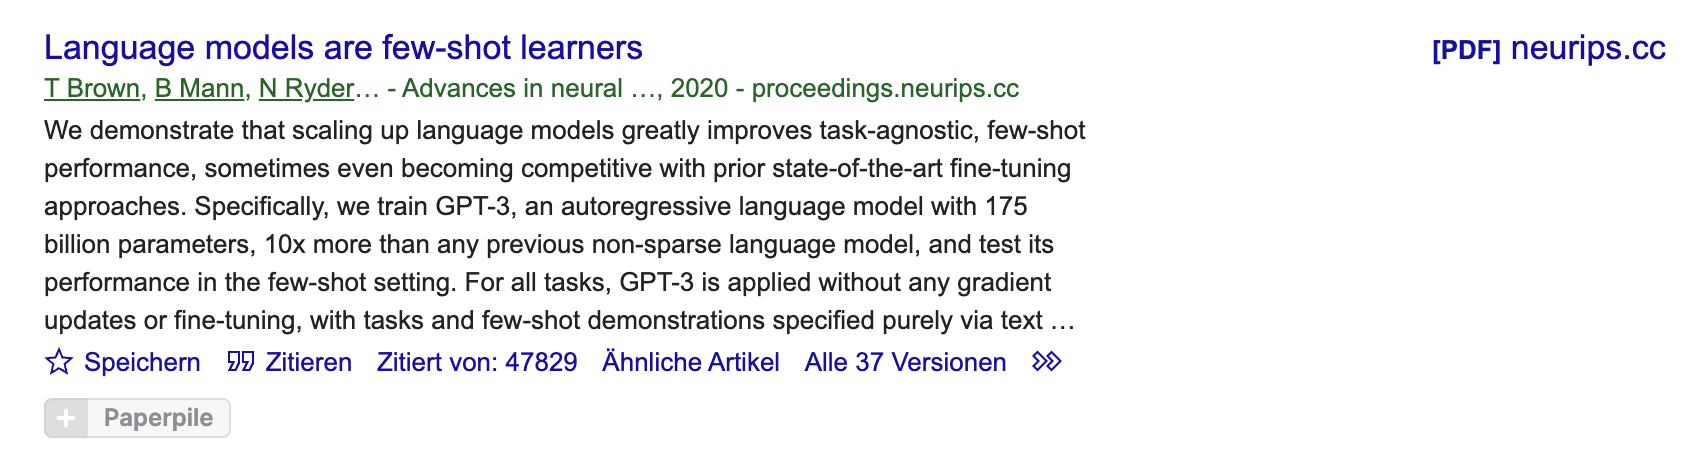

In dem Kontext ist das Paper **„Language Models are Few-Shot Learners“** von Brown et al. (2020), das 2020 GPT-3 vorgestellt hatte von besonderer Bedeutung. Statt das Modell neu zu trainieren, reicht es bei LLMs, dem Modell wenige Beispiele direkt im Prompt zur Verfügung zu stellen (Few-Shot), um neue Aufgaben zu lösen. Es kann in gewisser Weise von einem Paradigmenwechsel gesprochen werden: Statt für jede Aufgabe ein Modell feinzujustieren, können große Modelle durch Prompt-Engineering generalisieren.

[Hier geht es zum Paper](https://proceedings.neurips.cc/paper_files/paper/2020/file/1457c0d6bfcb4967418bfb8ac142f64a-Paper.pdf)

In [65]:
# In dem folgenden Beispiel wird ein Prompt verwendet, um Sentiment-Elemente aus Sätzen zu extrahieren. 
# Das Modell soll die relevanten Elemente identifizieren und deren Sentiment klassifizieren.
prompt = '''Satz: Es war richtig toll in Berlin.
Sentiment Elemente: [("Berlin", "positive")]
Satz: Das Essem war nicht so lecker.
Sentiment Elemente: [("Essen", "negative")]
Satz: Hier in Portugal gibt es fantastische Strände aber leider war das Wetter schlecht.
Sentiment Elemente: [("Strände", "positive"), ("Wetter", "negative")]
Satz: Die Stadt ist sehr schön.
Sentiment Elemente:'''

# raw True bedeutet, dass kein Prompting Template verwendet wird (kein Chatbot-Format)
# stop ist ein optionales Stop-Kriterium, um die Antwort zu beenden
print(execute_llm(prompt, model="gemma3:12b", raw=True, stop="]") + "]") 

 [("Stadt", "positive")]


In [66]:
#